In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

df_index = pd.read_csv("economic_index.csv")

df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [110]:
## Drop unneccsary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [ ]:
df_index

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [ ]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [ ]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


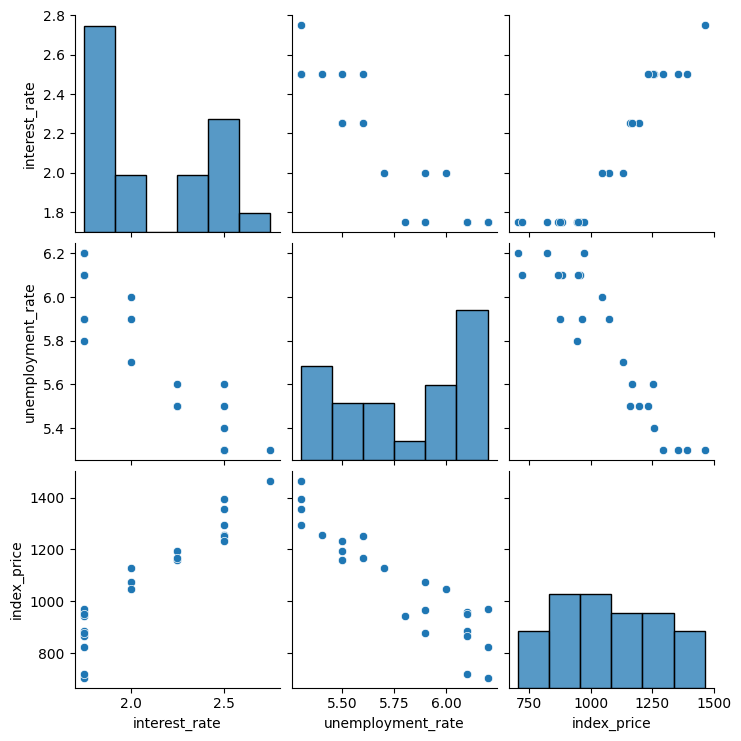

In [ ]:
import seaborn as sb
sb.pairplot(df_index)

Text(0.5, 0, 'unemployment_rate')

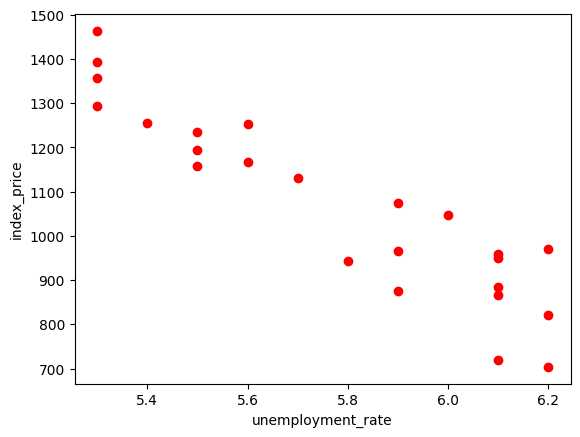

In [ ]:
plt.scatter(df_index["unemployment_rate"],df_index["index_price"],color='r')
plt.ylabel("index_price")
plt.xlabel("unemployment_rate")
# plt.plot(df_index)

Text(0.5, 0, 'unemployment_rate')

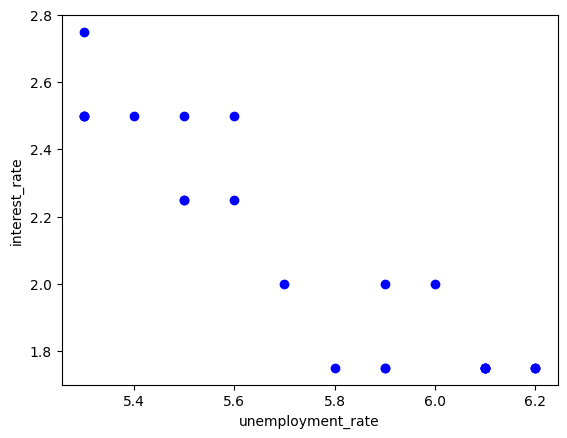

In [ ]:
plt.scatter(df_index["unemployment_rate"],df_index["interest_rate"],color='b')
plt.ylabel("interest_rate")
plt.xlabel("unemployment_rate")

Text(0.5, 0, 'index_price')

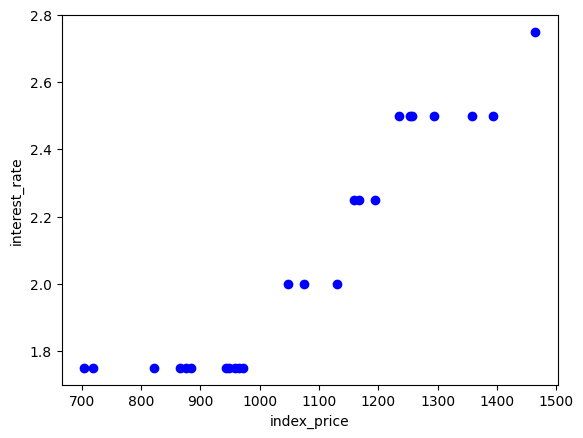

In [ ]:
plt.scatter(df_index["index_price"],df_index["interest_rate"],color='b')
plt.ylabel("interest_rate")
plt.xlabel("index_price")

In [111]:
## Identify Independent and Dependent Features

# X = df_index[["interest_rate","unemployment_rate"]]

# Y = df_index['index_price']

X = df_index.iloc[:,:-1]

Y = df_index.iloc[:,-1]


In [112]:

print(X)

print(Y)

    interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1
0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     123

In [113]:
## TRAIN TEST DATA
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

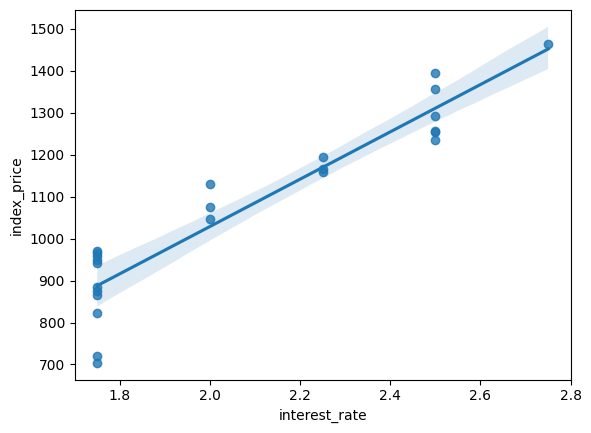

In [114]:
import seaborn as sb

sb.regplot(data=df_index,x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

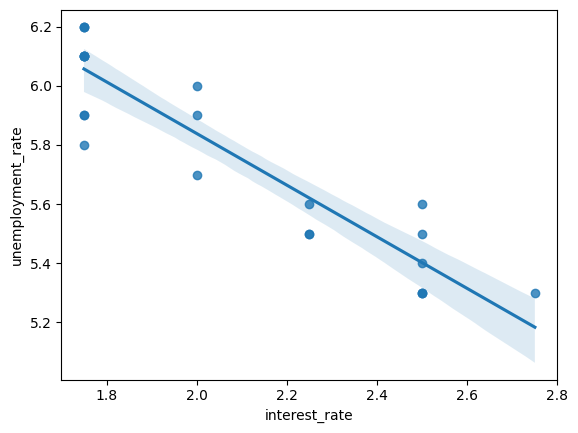

In [ ]:
sb.regplot(data=df_index,x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

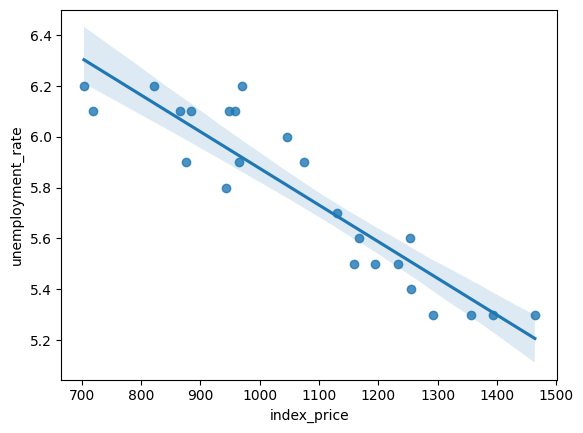

In [ ]:
sb.regplot(data=df_index,x=df_index['index_price'],y=df_index['unemployment_rate'])

In [115]:
## STANDARDIZATION
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()


x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [116]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [117]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [118]:
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)
print(validation_score)

np.mean(validation_score)


[-4921.61331265 -7686.87497294 -5135.9962549 ]


np.float64(-5914.828180162386)

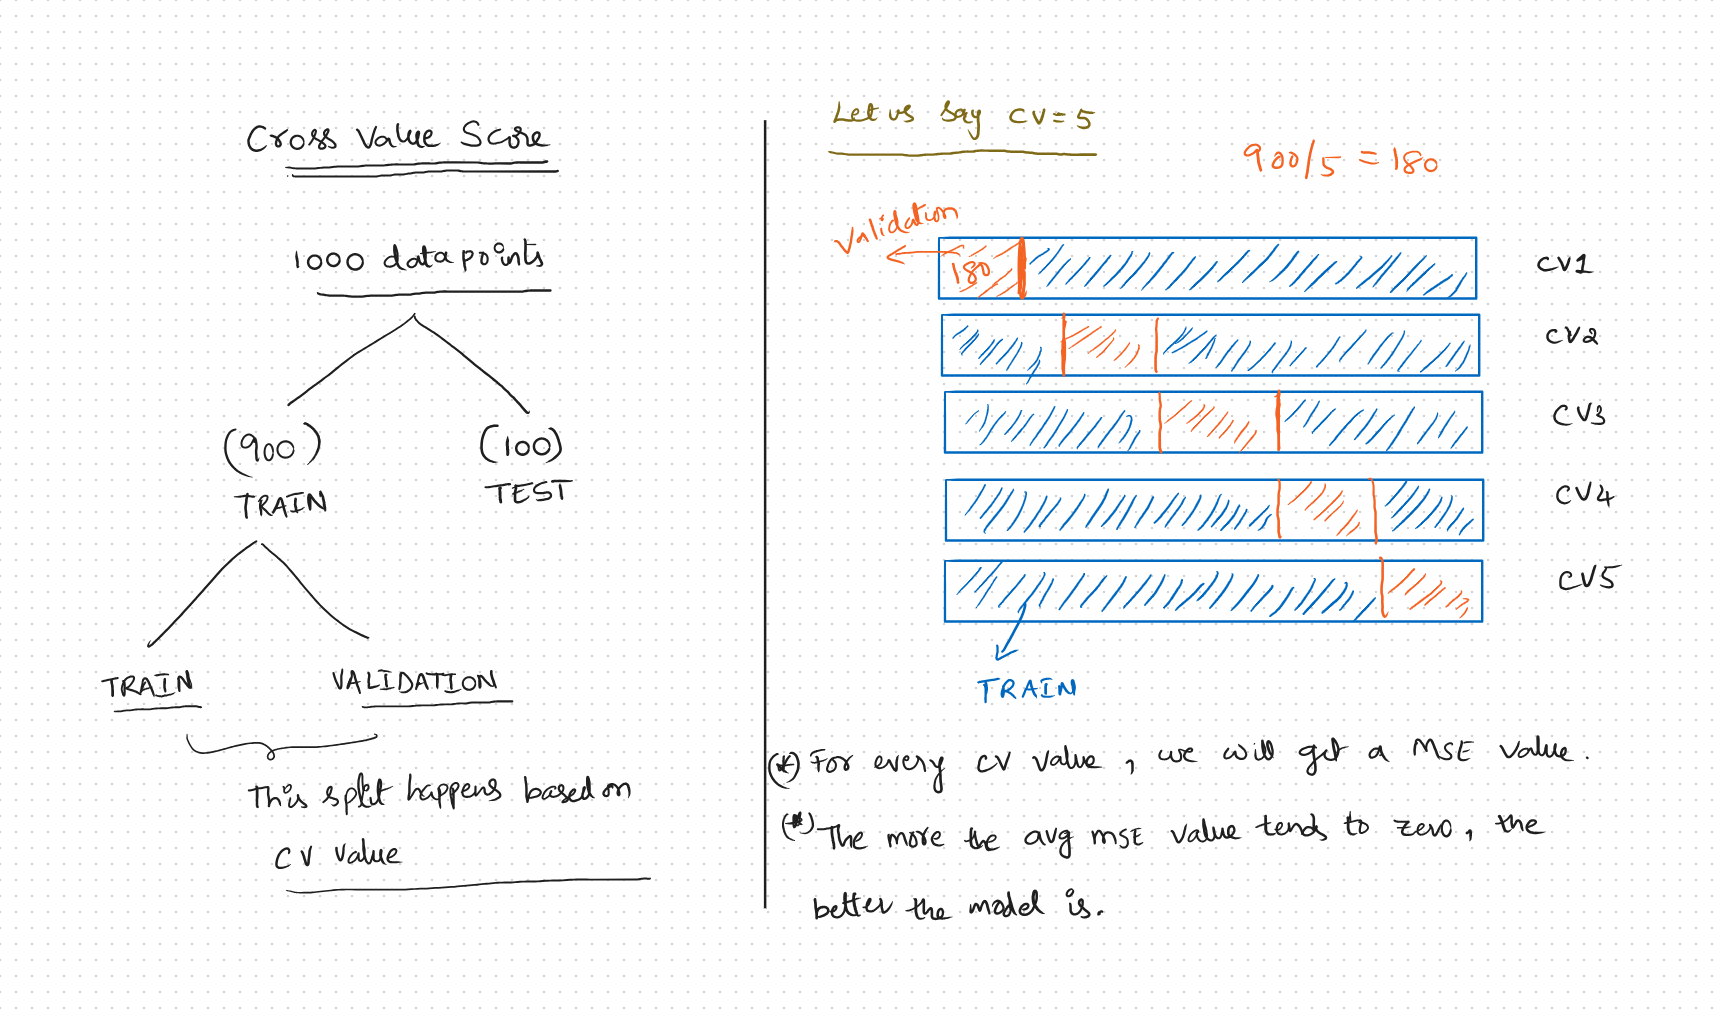

In [119]:
## Prediction 
y_pred = regression.predict(x_test)

In [120]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [121]:
## Performance Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"mean absolute error is {mae}")
print(f"mean squared error is {mse}")
print(f"root mean squared error is {rmse}")

mean absolute error is 59.935781523235484
mean squared error is 5793.762887712569
root mean squared error is 76.11677139574805


In [122]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

adjusted_r_square=1-((1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print(adjusted_r_square)

0.8278978091457145
0.7131630152428576


## ASSUMPTIONS
1. If the relationship between y_test and y_pred, then our model is performing well
2. If we displot our residuals (y-y hat), the plot should be normal distribution. This means again our model is performing well.
3. Our model is performing well, if we scatter plot w.r.t predictions and residuals is uniformly distributed without following any pattern.  

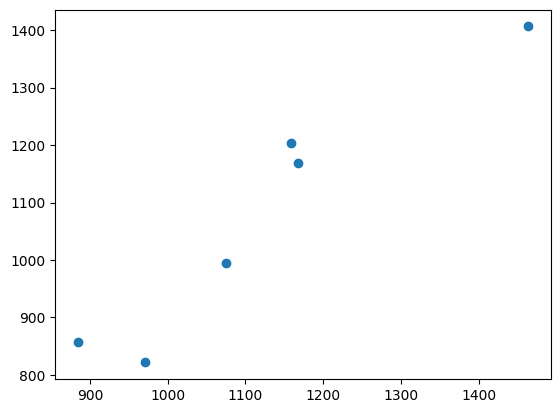

In [123]:
## 1. If the relationship between y_test and y_pred, then our model is performing well
plt.scatter(y_test,y_pred)

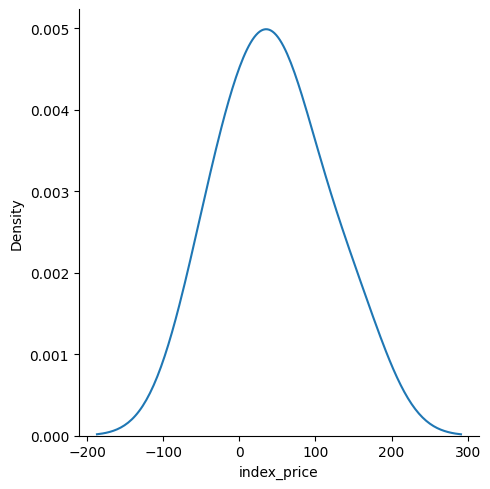

In [124]:
## 2. If we displot our residuals (y-y hat), the plot should be normal distribution. This means again our model is performing well.
residuals=y_test-y_pred
sb.displot(residuals,kind='kde')

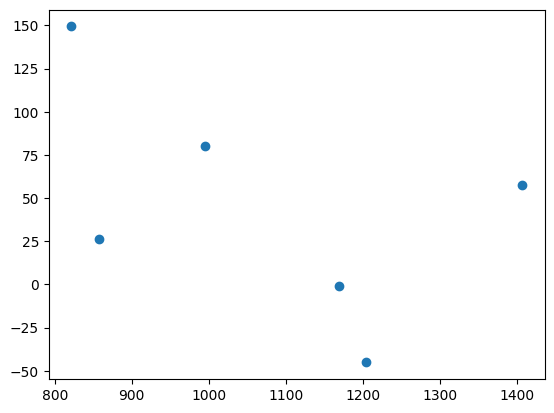

In [125]:
## 3. Our model is performing well, if we scatter plot w.r.t predictions and residuals is uniformly distributed without following any pattern.

plt.scatter(y_pred,residuals)

In [126]:
## OLS 

### OLS LINEAR REGRESSION
import statsmodels.api as sm

model = sm.OLS(y_train,x_train).fit()
## endog - 1d endogenous response variable - dependent variable
## exog - True Input variable.

prediction = model.predict(x_test)

print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [127]:
model.summary()

c:\Users\saakh\Learning\AI_ML\Data_Analyst_Bootcamp\PythonBasic\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 08 Feb 2025   Prob (F-statistic):                       0.754
Time:                        16:53:50   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
## Let us print coeff/ slope and intercept

print(f"regression.coef_ is {regression.coef_}")

print(f"regression.intercept_ is {regression.intercept_}")

regression.coef_ is [  88.27275507 -116.25716066]
regression.intercept_ is 1053.4444444444443
